<a href="https://colab.research.google.com/github/zhou1126/Marquette_teaching_finance/blob/main/loan_approval_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
target_folder = "/workspaces/Marquette_teaching_finance/"
taweilo_loan_approval_classification_data_path = kagglehub.dataset_download('taweilo/loan-approval-classification-data', path=target_folder)

print('Data source import complete.')

print(taweilo_loan_approval_classification_data_path)


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.

In [17]:
!pip install seaborn
import seaborn as sns


In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv')
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [9]:
# @title Exploratory data analysis

df.info()
df.describe(include='all')  # Summary statistics for all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [10]:
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix['loan_status'].sort_values(ascending=False))

loan_status                   1.000000
loan_percent_income           0.384880
loan_int_rate                 0.332005
loan_amnt                     0.107714
credit_score                 -0.007647
cb_person_cred_hist_length   -0.014851
person_emp_exp               -0.020481
person_age                   -0.021476
person_income                -0.135808
Name: loan_status, dtype: float64


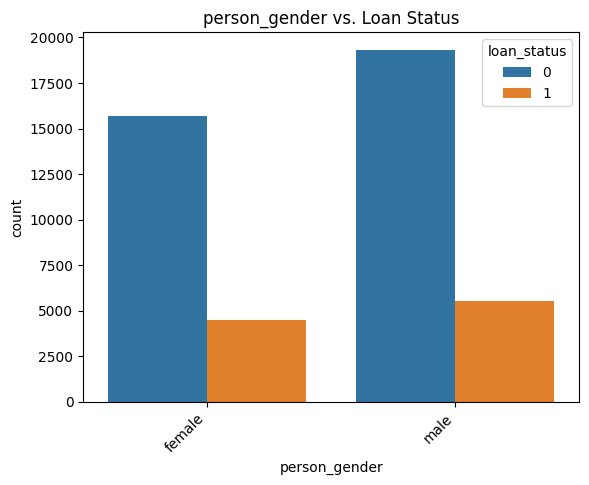

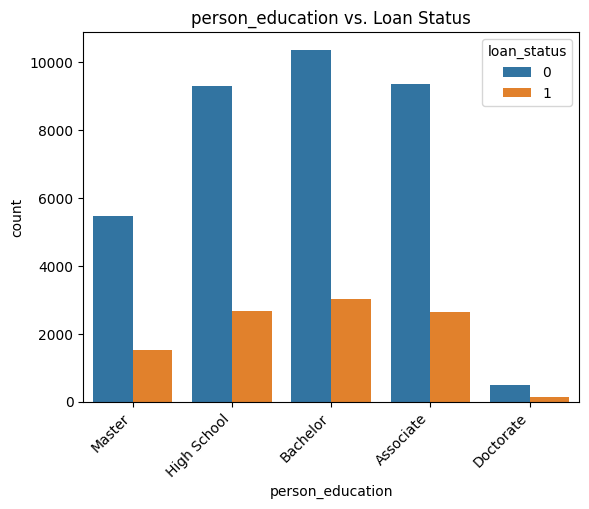

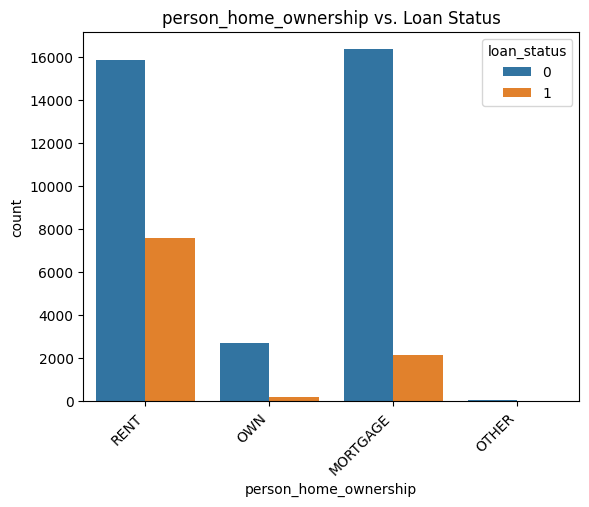

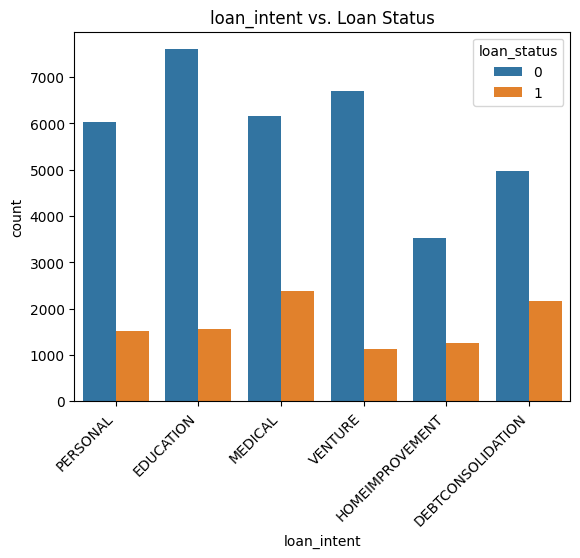

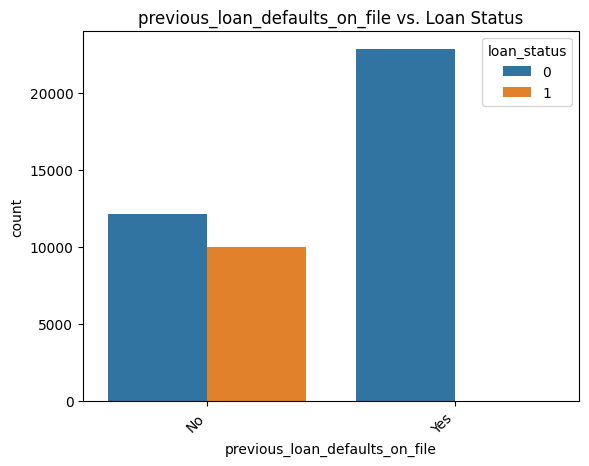

In [20]:
for col in df.select_dtypes(include=['object']).columns:
         sns.countplot(x=col, hue='loan_status', data=df)
         plt.title(f'{col} vs. Loan Status')
         plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
         plt.show()

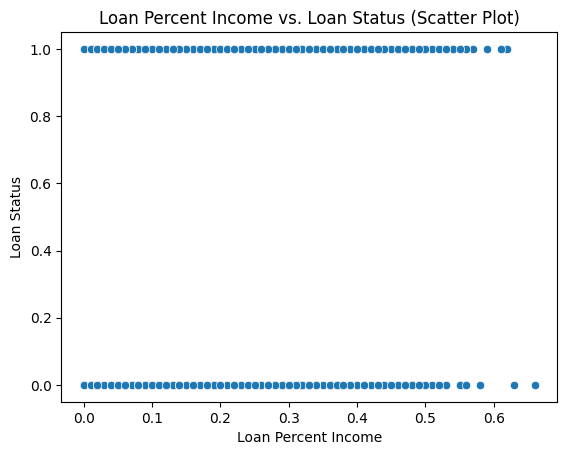

In [21]:
# @title Let's try linear regression

# Create a scatter plot or box plot
# Scatter plot:
sns.scatterplot(x='loan_percent_income', y='loan_status', data=df)
plt.title('Loan Percent Income vs. Loan Status (Scatter Plot)')

# Box plot:
# sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
# plt.title('Loan Percent Income vs. Loan Status (Box Plot)')

plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Status')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     7825.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:56:23   Log-Likelihood:                -20749.
No. Observations:               45000   AIC:                         4.150e+04
Df Residuals:                   44998   BIC:                         4.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0341    

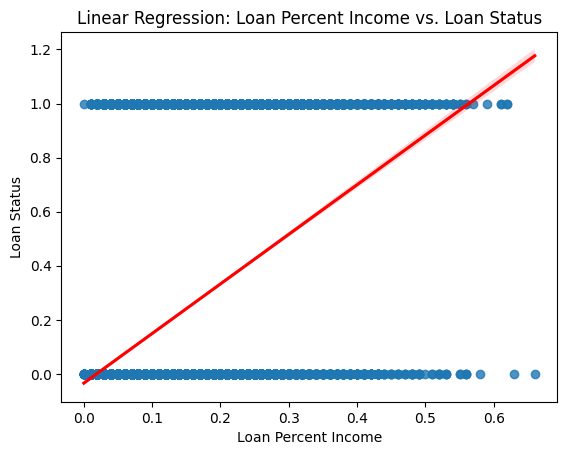

In [24]:
import statsmodels.formula.api as smf

# Assuming 'loan_status' is categorical (0 or 1), you might need to encode it numerically if it's not already.
# For example, if 'loan_status' is 'Charged Off' or 'Fully Paid', you can map them to 0 and 1:
# df['loan_status_numeric'] = df['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

# Run the linear regression
model = smf.ols('loan_status ~ loan_percent_income', data=df).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line with the data points
sns.regplot(x='loan_percent_income', y='loan_status', data=df, line_kws={'color': 'red'})
plt.title('Linear Regression: Loan Percent Income vs. Loan Status')
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Status')
plt.show()

Optimization terminated successfully.
         Current function value: 0.459470
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                45000
Model:                          Logit   Df Residuals:                    44998
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2025   Pseudo R-squ.:                  0.1326
Time:                        22:57:50   Log-Likelihood:                -20676.
converged:                       True   LL-Null:                       -23837.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8941      0.027   -106.286      0.000      -2.947      -2.841
lo

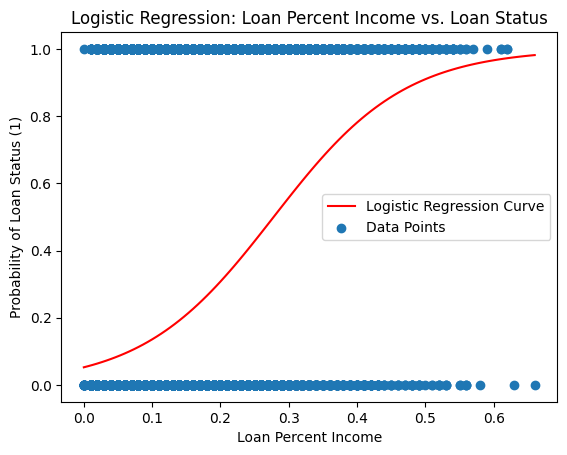

In [25]:
# @title Let's try logistic regression.

import statsmodels.formula.api as smf
import numpy as np

# Assuming 'loan_status' is already encoded as 0 or 1

# Run the logistic regression
model = smf.logit('loan_status ~ loan_percent_income', data=df).fit()

# Print the regression summary
print(model.summary())

# Create a range of loan_percent_income values for prediction
x_values = np.linspace(df['loan_percent_income'].min(), df['loan_percent_income'].max(), 100)

# Predict probabilities for the x_values
y_probs = model.predict(exog=dict(loan_percent_income=x_values))

# Plot the logistic regression curve
plt.plot(x_values, y_probs, color='red', label='Logistic Regression Curve')
plt.scatter(df['loan_percent_income'], df['loan_status'], label='Data Points')  # Add data points
plt.title('Logistic Regression: Loan Percent Income vs. Loan Status')
plt.xlabel('Loan Percent Income')
plt.ylabel('Probability of Loan Status (1)')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      8730
           1       0.71      0.27      0.39      2520

    accuracy                           0.81     11250
   macro avg       0.76      0.62      0.64     11250
weighted avg       0.80      0.81      0.78     11250


Accuracy: 0.8114666666666667

ROC AUC Score: 0.7137154539173439


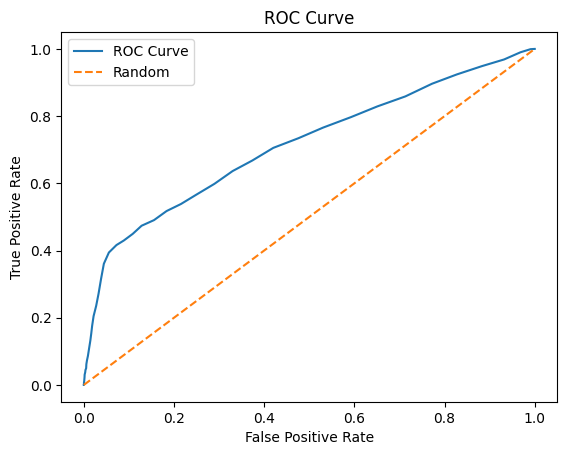

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

# Assuming 'loan_status' is already encoded as 0 or 1

# Split data into training and testing sets (if not already done)
X = df[['loan_percent_income']]  # Features
y = df['loan_status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the logistic regression model (if not already done)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate and print detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nROC AUC Score:", roc_auc_score(y_test, y_probs))

# You can also plot the ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()